# Decision Tree Regression
**What is Decision Tree?**
- A decision tree is supervised machine learning algorithm for both classification and regression.
- It represents decisions in a tree structure, where:
    * Each internal node represents a condition on a feature.
    * Each branch represents the outcome of that condition.
    * Each leaf node gives the final prediction.
- The model works by recursively splitting the data so that similar output fall into the same group.

## <center>Decision Tree Process</center>

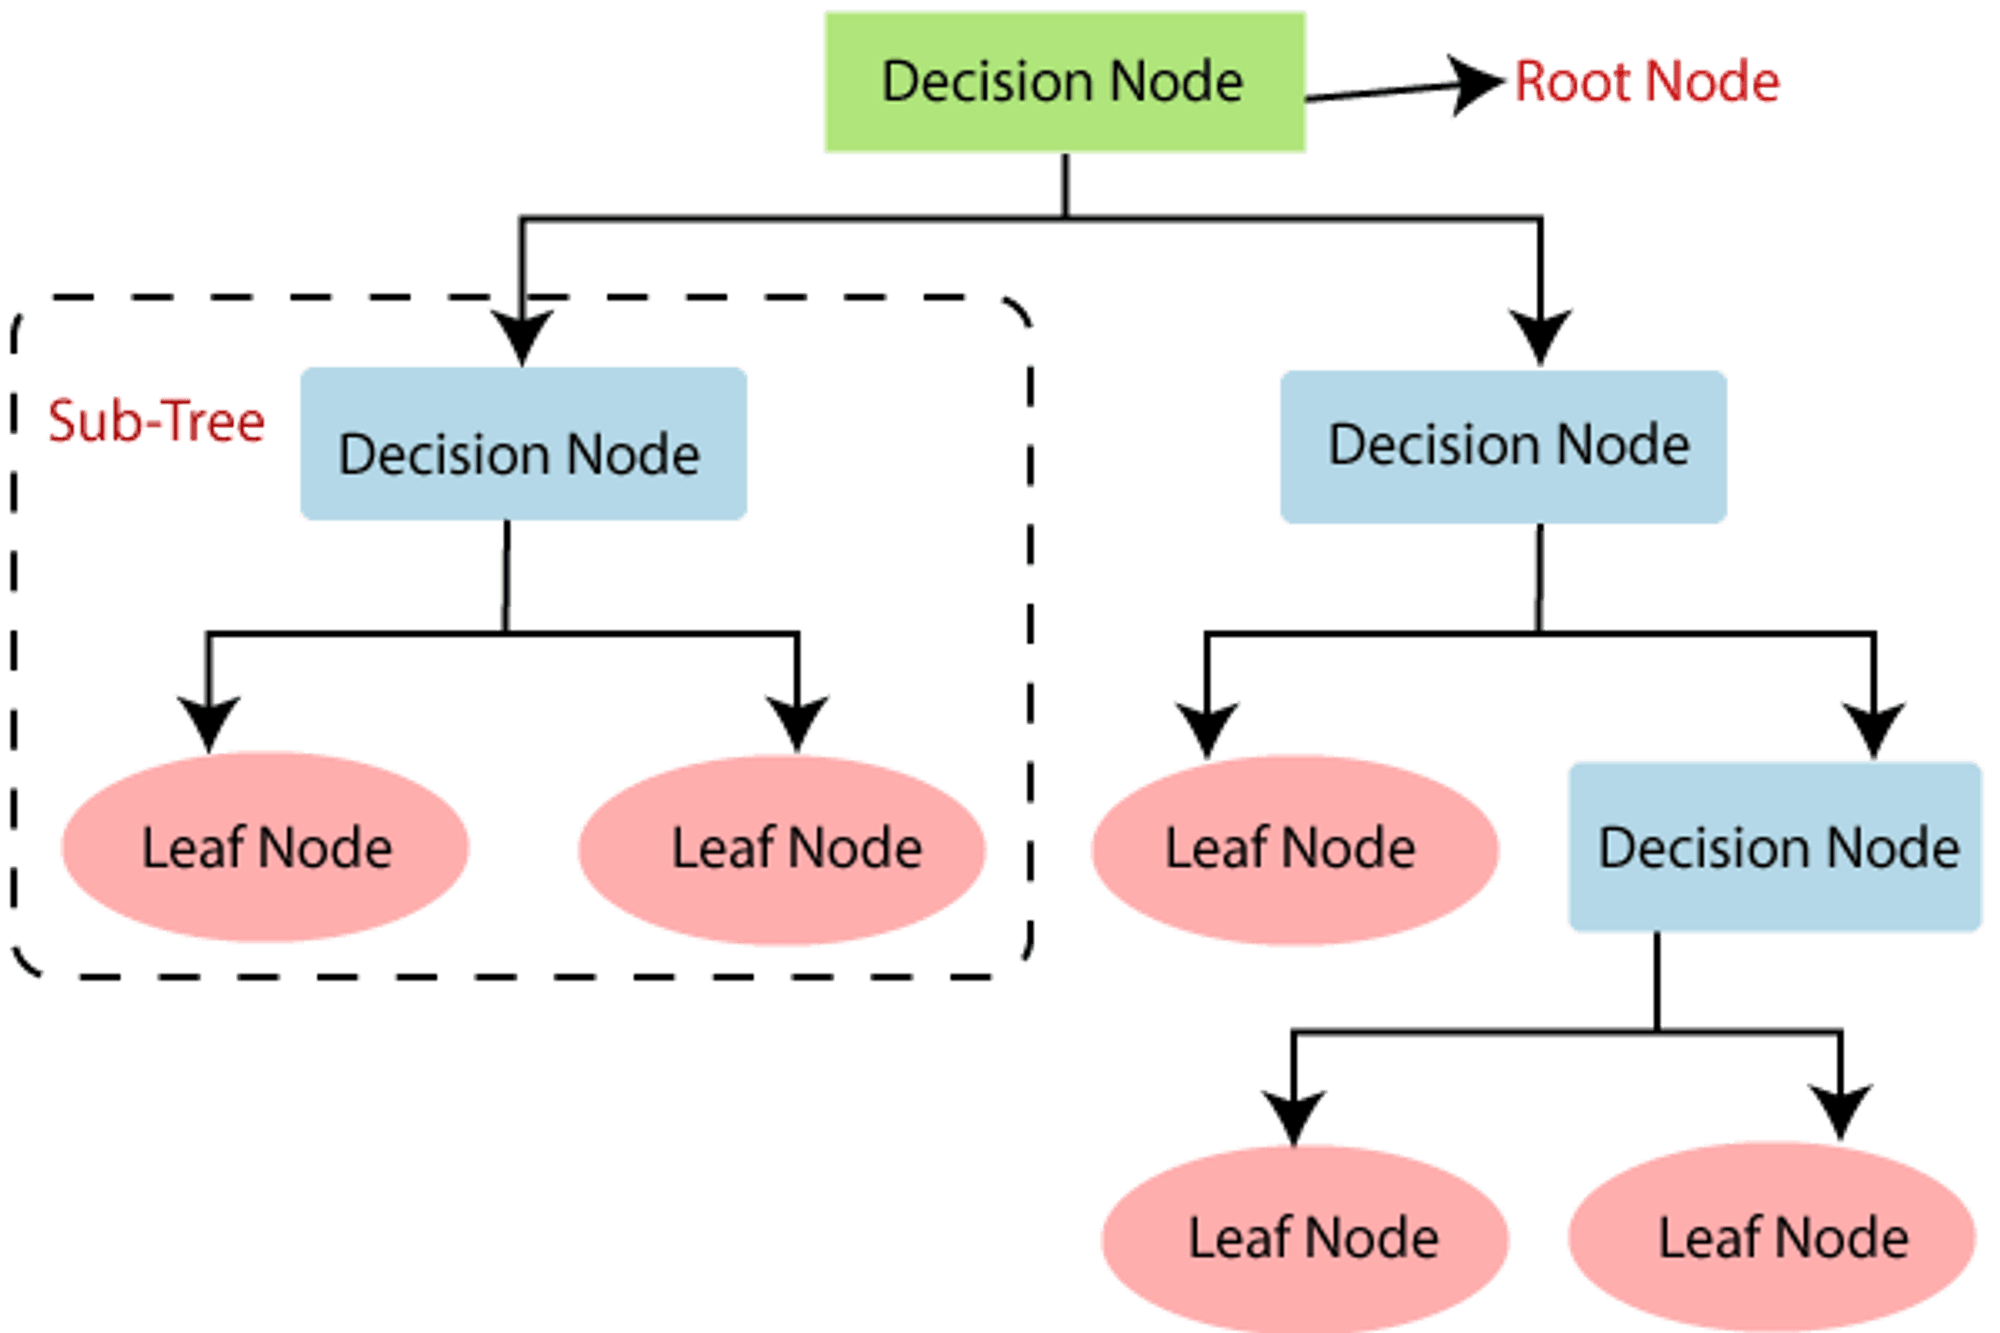

## Decision Tree – Key Components
- **Root node** :- The starting point of the tree, representing the entire dataset.
- **Internal/Decision node** :- A node that represents a test or decision on a specific attribute or feature.
- **Branch/Sub-tree** :- The outcome of a test decision, connecting a parent node to a child node.
- **Leaf node** :- A terminal node that does not split further and provides the final prediction or class label.
- **Splitting** :- The process of dividing a node into multiple sub-nodes based on a certain condition.

## Types of Decision Trees
1. Decision tree classifier
2. Decision tree regression

### 1. Decision Tree Classifier
A classification decision tree is used when the target variable is categorical (discrete classes).

🔷 **Examples**
- Yes/No
- Spam/Not Spam
- Pass/Fail

**How it works:**
The tree splits the dataset in such a way that each resulting node becomes as pure as possible, meaning most data points in that node belong to the same class.

### 2. Decision Tree Regression
A regression decision tree is used when the target variable is continuous (numerical values).

🔷 **Examples**
- House price
- Salary
- Temperature

**How it works:**
Instead of class purity, the goal is to minimize prediction error.

#### Dataset (Example 1)           

| Area (sq) | Price |
|----------|-------|
| 500  | 20 |
| 700  | 30 |
| 900  | 50 |
| 1100 | 60 |
| 1300 | 90 |

#### Decision Tree Condition

            [ Price ≤ 50 ]
              /       \
           True        False
            |            |
     Prices ≤ 50     Prices > 50



#### Calculations

For prediction, the mean value at the leaf node is calculated as:

$$
\frac{60 + 70}{2} = \frac{130}{2} = 65
$$


#### Prediction

**Given:**  
Area = 1000  

**Predicted Price:**  
**65**


#### Dataset (Example 2)

| Area | Price |
|------|-------|
| 500  | 50  |
| 700  | 65  |
| 900  | 80  |
| 1100 | 95  |
| 1300 | 110 |


### 🔹 Step 1: Predicting the Value at the Root Node

In a **Decision Tree Regression**, the prediction at any node is the **mean of the target values** of all samples present in that node.

$$
\bar{y}
= \frac{50 + 65 + 80 + 95 + 110}{5}
= \frac{400}{5}
= 80
$$

### 🔹 Step 2: Calculating Mean Squared Error (MSE) at the Root Node

After predicting the value at the root node, the **Mean Squared Error (MSE)** is calculated to measure the prediction error.

$$
\begin{aligned}
\text{MSE}
&= \frac{1}{N} \sum_{i=1}^{N} (\hat{y} - y_i)^2 \\
&= \frac{1}{5}\left[(-30)^2 + (-15)^2 + (0)^2 + (15)^2 + (30)^2\right] \\
&= \frac{1}{5}\left(900 + 225 + 0 + 225 + 900\right) \\
&= \frac{2350}{5} \\
\text{MSE} &= 470
\end{aligned}
$$


### 🔹 Step 3: Try Possible Split

To find a good split point for the regression tree, we first examine the **range of the feature values**.

- Minimum Area = 500  
- Maximum Area = 1300  

So, the range is:

$$
1300 - 500 = 800
$$

This gives a **candidate split point** around:

$$
\text{Area} < 800
$$

### 🔹 Step 4: Apply the Split Condition

            [ Area < 800 ]
              /       \
           True       False
            |           |
           500         900
           700         1100
                       1300


### 🔹 Step 5: Find Prediction Value for Each Subtree

In a **Decision Tree Regression**, the prediction at a node is the **mean of the target values** in that node.

**Left Subtree Prediction**  
Prices: 50, 65

$$
\hat{y}_{L} = \frac{50 + 65}{2} = 57.5
$$

**Right Subtree Prediction**  
Prices: 80, 95, 110

$$
\hat{y}_{R} = \frac{80 + 95 + 110}{3} = \frac{285}{3} = 95
$$

So,
- **Left prediction = 57.5**
- **Right prediction = 95**


### 🔹 Step 6: Find MSE for Each Subtree

**Left Subtree MSE**

For the left subtree, the predicted value is \( \hat{y}_L = 57.5 \).

$$
\begin{aligned}
\text{MSE}_L
&= \frac{1}{2}\left[(50 - 57.5)^2 + (65 - 57.5)^2\right] \\
&= \frac{1}{2}(56.25 + 56.25) \\
&= 56.25
\end{aligned}
$$


**Right Subtree MSE**

For the right subtree, the predicted value is \( \hat{y}_R = 95 \).

$$
\begin{aligned}
\text{MSE}_R
&= \frac{1}{3}\left[(80 - 95)^2 + (95 - 95)^2 + (110 - 95)^2\right] \\
&= \frac{1}{3}(225 + 0 + 225) \\
&= 150
\end{aligned}
$$


So,
- **Left MSE = 56.25**
- **Right MSE = 150**

### 🔹 Step 7: Total MSE After Split

Now we compute the **weighted total MSE** after the split.

- Left subtree weight = \( \frac{2}{5} \)  
- Right subtree weight = \( \frac{3}{5} \)

$$
\begin{aligned}
\text{Total MSE}
&= \frac{2}{5}(56.25) + \frac{3}{5}(150) \\
&= 22.5 + 90 \\
&= 112.5
\end{aligned}
$$

### 🔹 Comparison of MSE Before and After Split

$$
\begin{aligned}
\text{Root Node MSE} &= 470 \\
\text{Split Node MSE} &= 112.5
\end{aligned}
$$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("Datasets/house_price_decision_tree.csv")
data

,house_size_sqft,bedrooms,age_years,price_lakhs
0,450,1,25,38.5
1,500,1,22,42.0
2,550,1,20,45.2
3,600,2,18,50.1
4,650,2,17,53.0
...,...,...,...,...
86,4750,5,1,348.0
87,4800,5,1,351.6
88,4850,5,1,355.2
89,4900,5,1,358.8


In [3]:
X = data[['house_size_sqft', 'bedrooms', 'age_years']]
y = data ['price_lakhs']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
model = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=42)

In [6]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [7]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [8]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 6.263796296296292
Test MSE: 36.81209064327487


In [9]:
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train R²:", train_r2)
print("Test R²:", test_r2)

Train R²: 0.9993019896137146
Test R²: 0.9956923642606307


In [10]:
new_house = pd.DataFrame({
    'house_size_sqft': [1500],
    'bedrooms': [3],
    'age_years': [5]
})

predicted_price = model.predict(new_house)
print(f"Predicted house price: {predicted_price[0]:.2f} lakhs")

Predicted house price: 124.33 lakhs
